# 1 Задание

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

M1 = 2e30

M2 = 1.9e27
#M2 = 5.98e24
M3 = 8.9e22
#M3 = 7.33e22
R2 = 71.5e6
#R2 = 6.37e6
R3 = 1.821e6
#R3 = 1.74e6
V2 = 13e3
#V2 = 3e4
V23 = 17.3e3
#V23 = 1.02e3
R12 = 7.8e11
#R12  = 1.49e11
R23 = 4.21e8
#R23 = 3.84e8
G = 6.67e-11

x2_0 = R12
x3_0 = R12 + R23
y2_0 = 0
y3_0 = 0
v2_x_0 = 0
v3_x_0 = 0
v2_y_0 = V2
v3_y_0 = V2 + V23



t_start = 60 * 60 * 24 * 0
t_end = 60 * 60 * 24 * 4333
n = 1000

def ODE(y, t, m1, m2, m3, g):
    ux, uy, wx, wy, x2, y2, x3, y3 = y

    return np.array([-g * m1 * x2 / ((x2 ** 2 + y2 ** 2) ** 1.5) + g * m3 * (x3 - x2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5),
                     -g * m1 * y2 / ((x2 ** 2 + y2 ** 2) ** 1.5) + g * m3 * (y3 - y2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5),
                     -g * m1 * x3 / ((x3 ** 2 + y3 ** 2) ** 1.5) - g * m2 * (x3 - x2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5), 
                     -g * m1 * y3 / ((x3 ** 2 + y3 ** 2) ** 1.5) - g * m2 * (y3 - y2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5),
                     ux,
                     uy,
                     wx,
                     wy])

y0 = np.array([v2_x_0, v2_y_0, v3_x_0, v3_y_0, x2_0, y2_0, x3_0, y3_0])

t = np.linspace(t_start, t_end, n)

sol = odeint(ODE, y0, t, args=(M1, M2, M3, G))

v2_x, v2_y, v3_x, v3_y, x2, y2, x3, y3 = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3],\
        sol[:, 4], sol[:, 5], sol[:, 6], sol[:, 7]

### график траетрии Юпитера и Ио

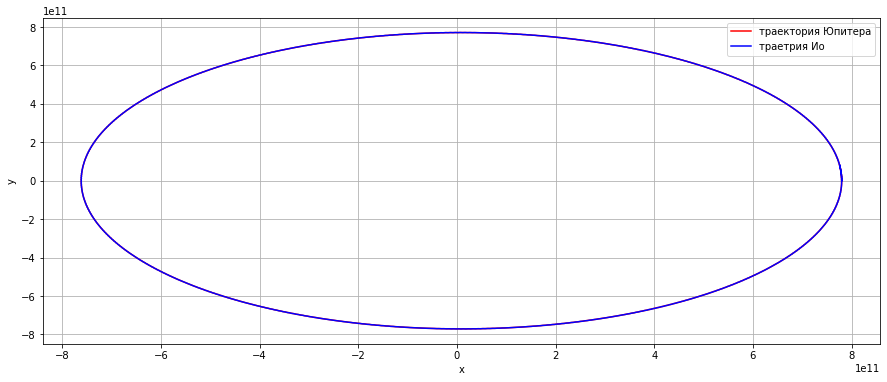

In [5]:
plt.figure(figsize=(15,6))

plt.plot(x2, y2, 'r', label = 'траектория Юпитера')
plt.plot(x3, y3, 'b', label = 'траетрия Ио')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### График траектории Юпитера относительно солнца

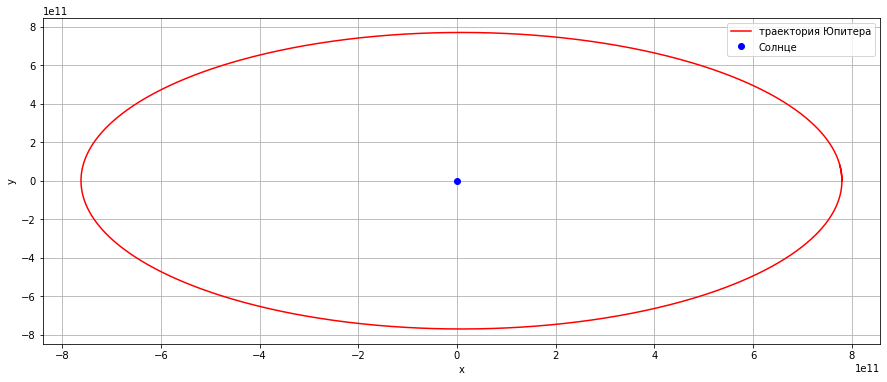

In [7]:
plt.figure(figsize=(15,6))

plt.plot(x2, y2, 'r', label = 'траектория Юпитера')
plt.plot(0, 0,'bo', label = 'Солнце') 

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# 2 Задание

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

M1 = 2e30
M2 = 1.9e27
#M2 = 5.98e24
M3 = 8.9e22
#M3 = 7.33e22
R2 = 71.5e6
#R2 = 6.37e6
R3 = 1.821e6
#R3 = 1.74e6
V2 = 13e3
#V2 = 3e4
V23 = 17.3e3
#V23 = 1.02e3
R12 = 7.8e11
#R12  = 1.49e11
R23 = 4.21e8
#R23 = 3.84e8
G = 6.67e-11

x2_0 = R12
x3_0 = R12 + R23
y2_0 = 0
y3_0 = 0
v2_x_0 = 0
v3_x_0 = 0
v2_y_0 = V2
v3_y_0 = V2 + V23


H = 8e5
T = 3900
M0 = 85
u = 5000
VOrbit = np.sqrt(G * M2 / (H + R2))

def calculation_system_moution(alpha = 0, M_T = 1000, t_end = 1):
    t_one_day = 60 * 60 * 24

    Mk = (M_T + M0) * 0.025
    x_0 = R12 + (H + R2) * np.cos(alpha)
    y_0 = - (H + R2) * np.sin(alpha)
    v_x_0 = - VOrbit * np.sin(alpha)
    v_y_0 = V2 - VOrbit * np.cos(alpha)


    # x_0 = R12 + (H + R2)
    # y_0 = 0
    # v_x_0 = 0
    # v_y_0 = V2 + VOrbit

    def m(t):
        if t < T:
            return Mk + M0 + M_T*(1 - t / T)
        else:
            return Mk + M0

    def dm_dt(t):
        if t < T:
            return -M_T / T
        else:
            return 0


    t_start = t_one_day * 0
    t_end = t_one_day * 1.77
    n = 1000

    def ODE(y, t, m1, m2, m3, g, u):
        ux, uy, wx, wy, x2, y2, x3, y3, vx, vy, x, y = y

        return np.array([-g * m1 * x2 / ((x2 ** 2 + y2 ** 2) ** 1.5) + g * m3 * (x3 - x2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5),
                        -g * m1 * y2 / ((x2 ** 2 + y2 ** 2) ** 1.5) + g * m3 * (y3 - y2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5),
                        -g * m1 * x3 / ((x3 ** 2 + y3 ** 2) ** 1.5) - g * m2 * (x3 - x2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5), 
                        -g * m1 * y3 / ((x3 ** 2 + y3 ** 2) ** 1.5) - g * m2 * (y3 - y2) / (((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 1.5),
                        ux,
                        uy,
                        wx,
                        wy,
                        -u * dm_dt(t) * vx / (m(t) * (vx ** 2 + vy ** 2) ** 0.5) - g * x * m1 / (x ** 2 + y ** 2) ** 1.5 - g * (x -  x2) * m2 / ((x - x2) ** 2 + (y - y2) ** 2) ** 1.5 - g * (x -  x3) * m3 / ((x - x3) ** 2 + (y - y3) ** 2) ** 1.5,
                        -u * dm_dt(t) * vy / (m(t) * (vx ** 2 + vy ** 2) ** 0.5) - g * y * m1 / (x ** 2 + y ** 2) ** 1.5 - g * (y -  y2) * m2 / ((x - x2) ** 2 + (y - y2) ** 2) ** 1.5 - g * (y -  y3) * m3 / ((x - x3) ** 2 + (y - y3) ** 2) ** 1.5,
                        vx,
                        vy
                        ])

    y0 = np.array([v2_x_0, v2_y_0, v3_x_0, v3_y_0, x2_0, y2_0, x3_0, y3_0, v_x_0, v_y_0, x_0, y_0])

    t = np.linspace(t_start, t_end, n)

    sol = odeint(ODE, y0, t, args=(M1, M2, M3, G, u))

    return sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3],\
        sol[:, 4], sol[:, 5], sol[:, 6], sol[:, 7],\
        sol[:, 8], sol[:, 9], sol[:, 10], sol[:, 11]

ux, uy, wx, wy, x2, y2, x3, y3, vx, vy, x, y = calculation_system_moution() 

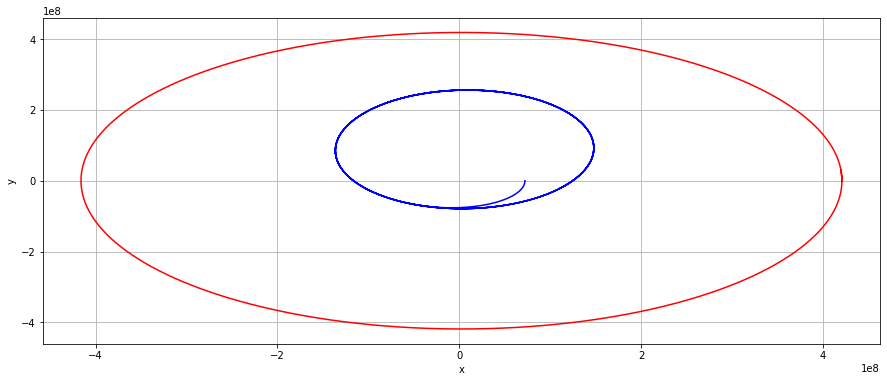

In [2]:
plt.figure(figsize=(15,6))
# plt.plot(sol[:, 4], sol[:, 5], ',r')
# plt.plot(sol[:, 6], sol[:, 7], ',b')

plt.plot(x - x2, y - y2, 'b')
plt.plot(x3 - x2, y3 - y2, 'r')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Найдем обьем топлива, при котором сможем долететь до спутника

In [4]:
def draw_traectori(alpha, M_T, x, y, x2, y2, x3, y3):
    # ux, uy, wx, wy, x2, y2, x3, y3, vx, vy, x, y = calculation_system_moution(alpha, M_T)
    plt.figure(figsize=(8,4))
    # plt.plot(sol[:, 4], sol[:, 5], ',r')
    # plt.plot(sol[:, 6], sol[:, 7], ',b')

    plt.plot(x - x2, y - y2, 'b')
    plt.plot(x3 - x2, y3 - y2, 'r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'M_T = {M_T}, alpha = {alpha}')
    plt.grid(True)
    plt.show()

In [ ]:
alpha_range = np.linspace(0, 2 * np.pi, 36)
M_T_max = 3000

for alpha in alpha_range:
    M_T = 0
    M_step = 25
    while True:
        M_T += M_step

        ux, uy, wx, wy, x2, y2, x3, y3, vx, vy, x, y = calculation_system_moution(alpha, M_T, 1)

        idx_coll = x2.shape[0]
        is_coll = False
        for i in range(x2.shape[0]):
            R = ((x3[i] - x[i]) ** 2 + (y3[i] - y[i]) ** 2) ** 0.5
            if (R <= R3):
                idx_coll = i
                is_coll = True
                break

        # if is_coll:
        #     M_step /= 2
        #     k = 1
        # else:
        #     M_step *= 2
        #     k = 1
        if is_coll:
            M_T_max = M_T
            draw_traectori(alpha, M_T_max, x[:idx_coll+1], y[:idx_coll+1], x2[:idx_coll+1], y2[:idx_coll+1], x3[:idx_coll+1], y3[:idx_coll+1])
            break
        # else:
            # if (x[-1] ** 2 + y[-1] ** 2) ** 0.5 < (x3[-1] ** 2 + y3[-1] ** 2) ** 0.5:
            #     M_T += M_step
            # else:
            #     print('VOT OTNILI')
            #     M_T -= M_step

    
        if M_T >= M_T_max:
            print(f'alpha = {int(alpha * 180 / np.pi)} not found M_T < {int(M_T_max)}')
            break




----------------------------------------------------------------------------------------------------


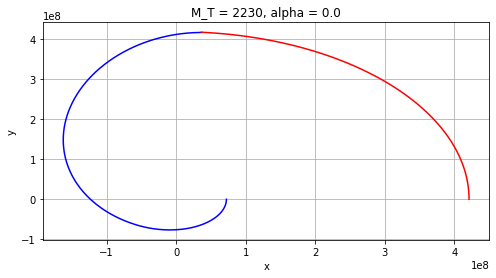

----------------------------------------------------------------------------------------------------


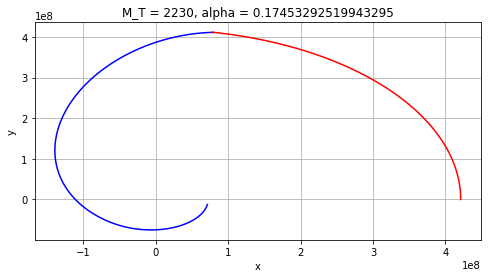

----------------------------------------------------------------------------------------------------


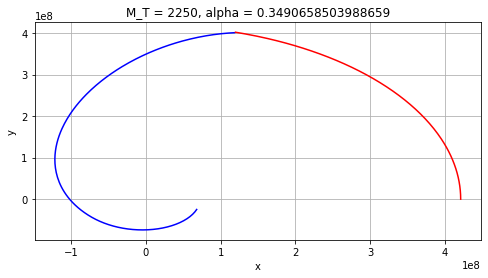

----------------------------------------------------------------------------------------------------


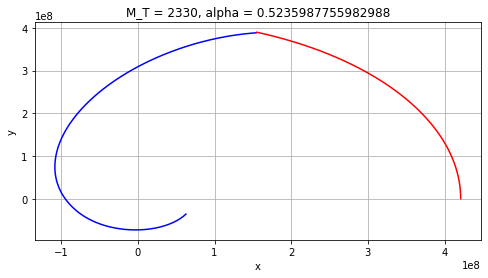

----------------------------------------------------------------------------------------------------


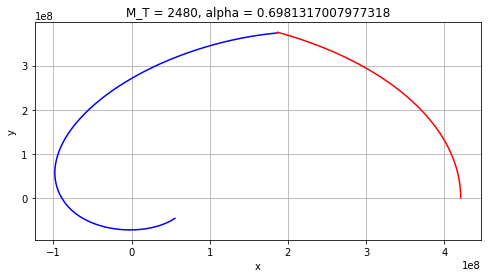

----------------------------------------------------------------------------------------------------


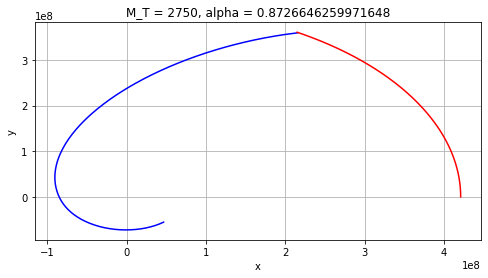

----------------------------------------------------------------------------------------------------


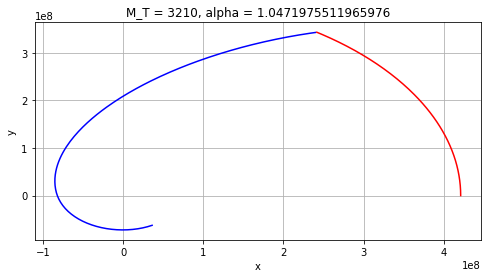

----------------------------------------------------------------------------------------------------


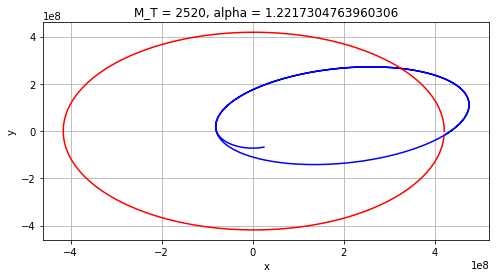

----------------------------------------------------------------------------------------------------


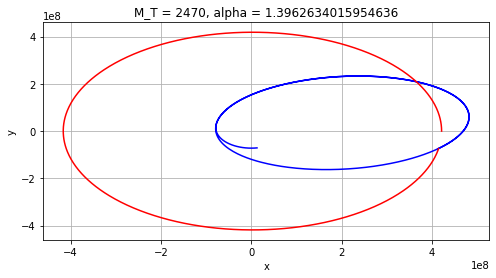

----------------------------------------------------------------------------------------------------


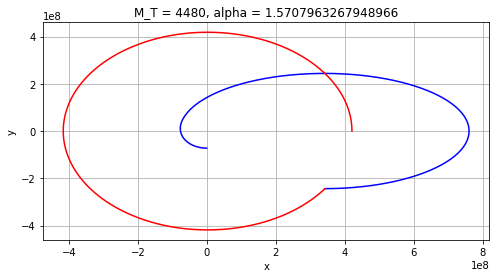

----------------------------------------------------------------------------------------------------


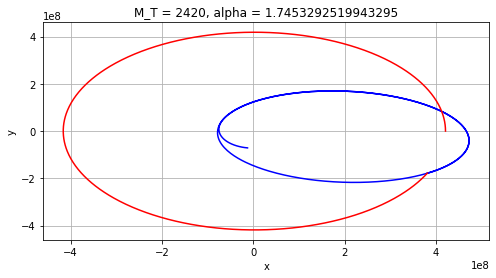

----------------------------------------------------------------------------------------------------


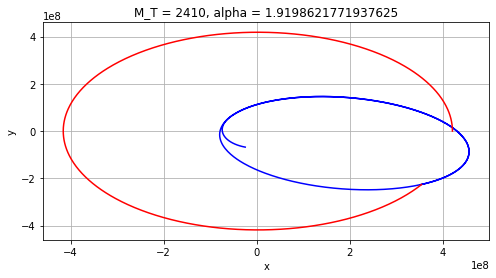

----------------------------------------------------------------------------------------------------


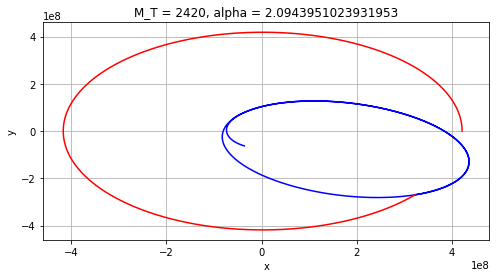

----------------------------------------------------------------------------------------------------


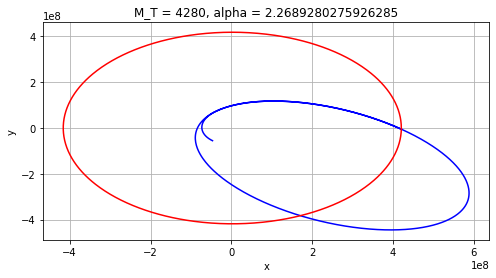

----------------------------------------------------------------------------------------------------


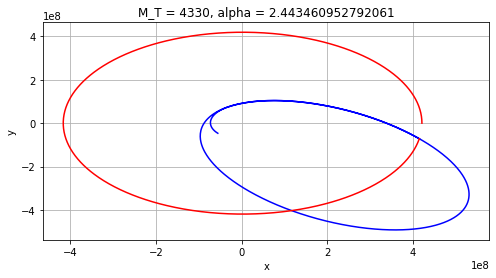

----------------------------------------------------------------------------------------------------


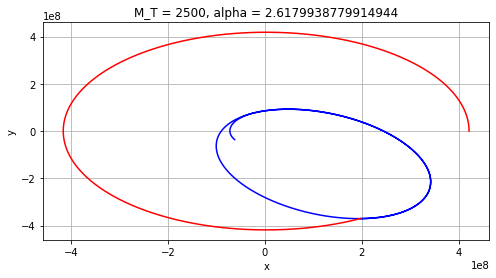

----------------------------------------------------------------------------------------------------


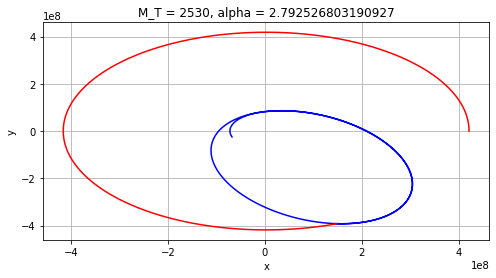

----------------------------------------------------------------------------------------------------


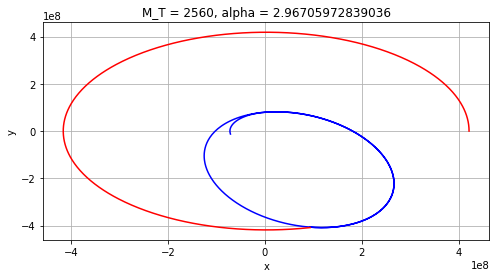

----------------------------------------------------------------------------------------------------


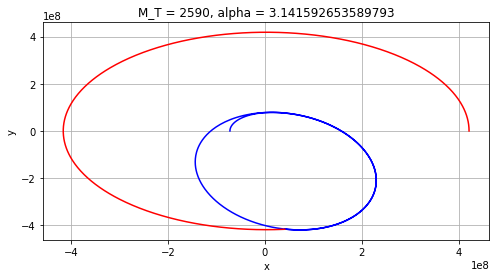

----------------------------------------------------------------------------------------------------


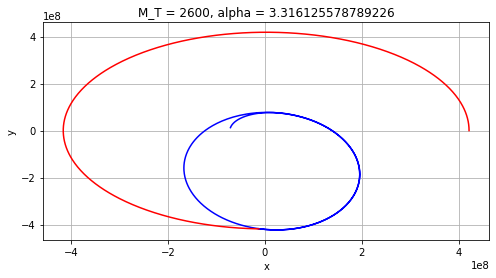

----------------------------------------------------------------------------------------------------


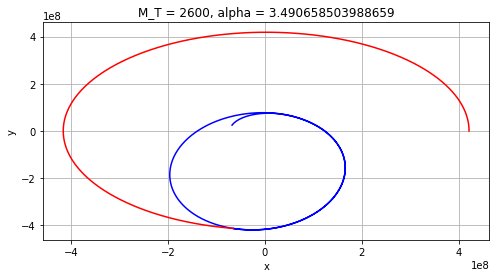

----------------------------------------------------------------------------------------------------


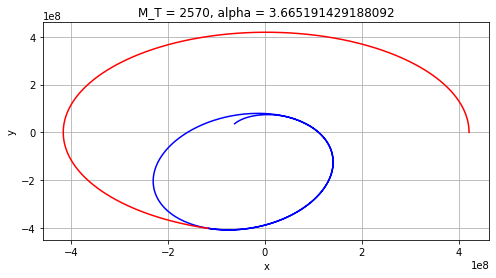

----------------------------------------------------------------------------------------------------


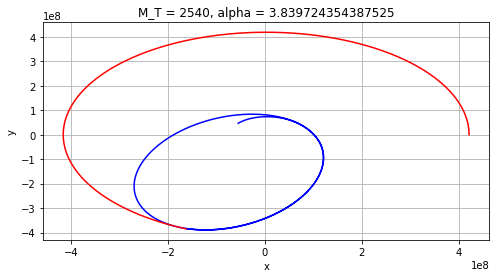

----------------------------------------------------------------------------------------------------


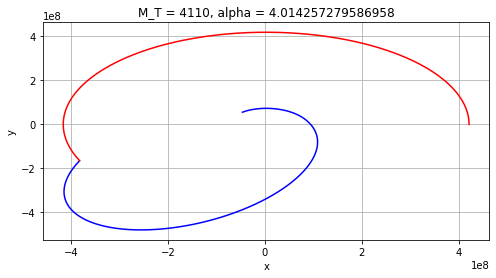

----------------------------------------------------------------------------------------------------


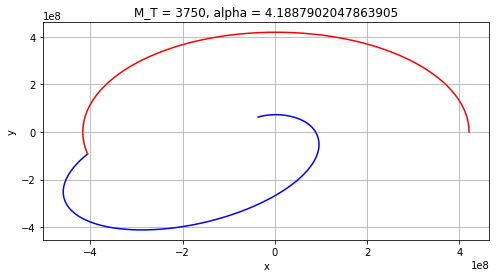

----------------------------------------------------------------------------------------------------


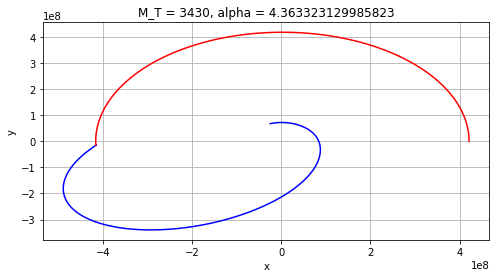

----------------------------------------------------------------------------------------------------


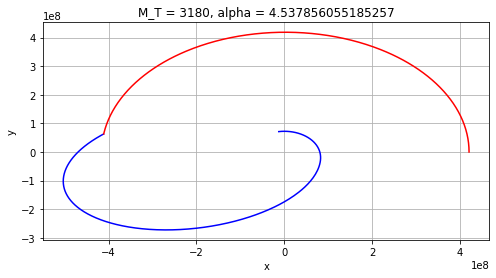

----------------------------------------------------------------------------------------------------


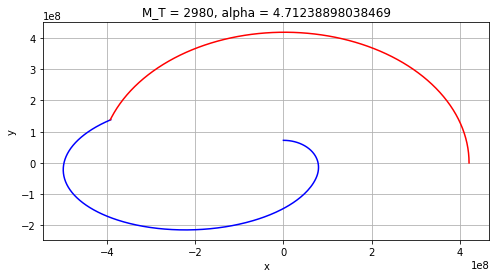

----------------------------------------------------------------------------------------------------


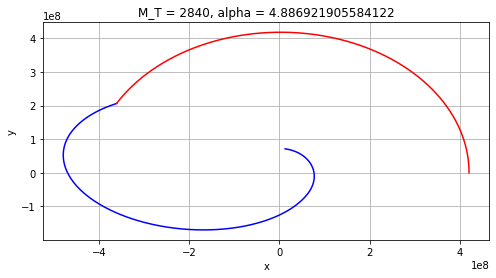

----------------------------------------------------------------------------------------------------


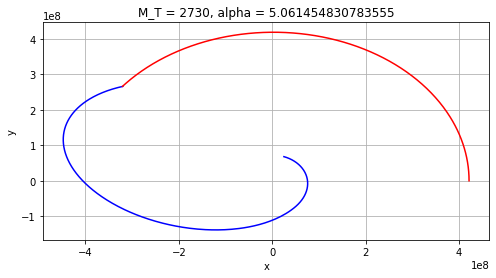

----------------------------------------------------------------------------------------------------


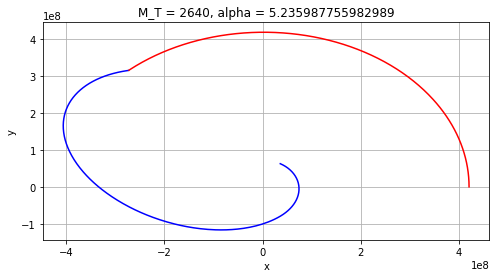

----------------------------------------------------------------------------------------------------


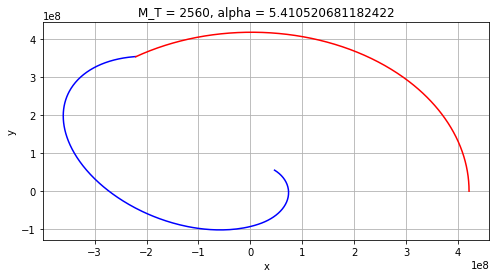

----------------------------------------------------------------------------------------------------


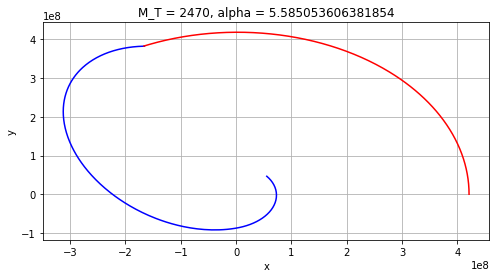

----------------------------------------------------------------------------------------------------


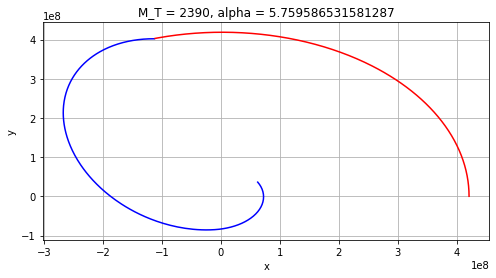

----------------------------------------------------------------------------------------------------


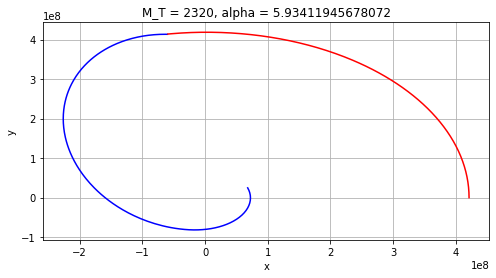

----------------------------------------------------------------------------------------------------


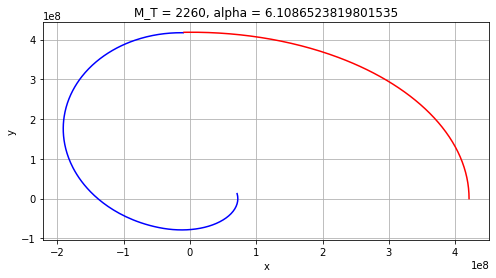

----------------------------------------------------------------------------------------------------


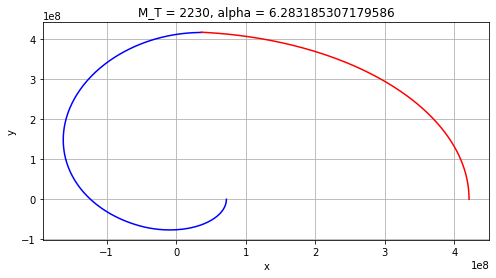

In [14]:
alpha_range = np.linspace(0, 2 * np.pi, 37)
M_T_array = []
M_T_max = 6000

for alpha in alpha_range:
    print('-' * 100)
    M_T = 10
    M_step = 10
    is_negative_M_T = False
    while True:
        #M_T += M_step

        ux, uy, wx, wy, x2, y2, x3, y3, vx, vy, x, y = calculation_system_moution(alpha, M_T, 1)

        idx_coll = x2.shape[0]
        is_coll = False
        for i in range(x2.shape[0]):
            R = ((x3[i] - x[i]) ** 2 + (y3[i] - y[i]) ** 2) ** 0.5
            if (R <= R3):
                idx_coll = i
                is_coll = True
                break

        # if is_coll:
        #     M_step /= 2
        #     k = 1
        # else:
        #     M_step *= 2
        #     k = 1
        if is_coll:
            # M_T_max = M_T
            # draw_traectori(alpha, M_T_max, x[:idx_coll+1], y[:idx_coll+1], x2[:idx_coll+1], y2[:idx_coll+1], x3[:idx_coll+1], y3[:idx_coll+1])
            break
        else:
            # if ((x[-1] - x2[-1]) ** 2 + (y[-1] - y2[-1]) ** 2) ** 0.5 < ((x3[-1] - x2[-1]) ** 2 + (y3[-1] - y2[-1]) ** 2) ** 0.5:
            #     M_T += M_step
            # else:
            #     print('VOT OTNILI')
            #     M_T -= M_step
            #     if M_T <= 0 :
            #         is_negative_M_T = True
            M_T += M_step
        
        if is_negative_M_T:
            break
    
        if M_T >= M_T_max:
            print(f'alpha = {int(alpha * 180 / np.pi)} not found M_T < {int(M_T_max)}')
            break
    
    M_T_array.append(M_T)
    draw_traectori(alpha, M_T, x[:idx_coll+1], y[:idx_coll+1], x2[:idx_coll+1], y2[:idx_coll+1], x3[:idx_coll+1], y3[:idx_coll+1])




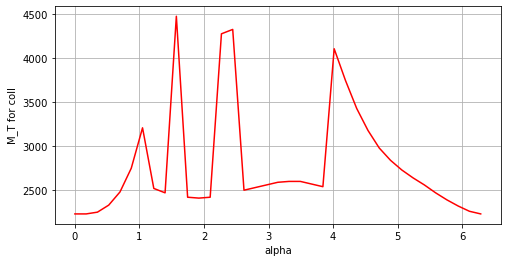

In [15]:
plt.figure(figsize=(8,4))

plt.plot(alpha_range, M_T_array, 'r')

plt.xlabel('alpha')
plt.ylabel('M_T for coll')
plt.grid(True)
plt.show()